Plotting data

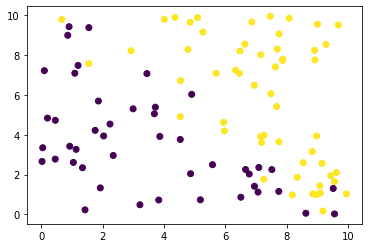

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data_classification.csv', header=None)
c1 = data.iloc[:,0]
c2 = data.iloc[:,1]
c3 = data.iloc[:,2]

plt.scatter(c1, c2, c=c3)
plt.show()

In [88]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X]
y = np.asmatrix(y.values).T
theta = np.zeros((X.shape[1], 1))

$$
\begin{align}
z = W_0 + W_1x + W_2y\\
P(class = 1) = \cfrac{1}{1 + e^{-z}}
\end{align}
$$

In [89]:
def net_input(theta, x):
    return np.dot(x, theta)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def probability(theta, x):
    return sigmoid(net_input(theta, x))

Instead of Mean Squared Error, we use Cross-Entropy cost function. Cross-entropy loss can be divied into two separate cost functions: one for y = 1 and one for y = 0.

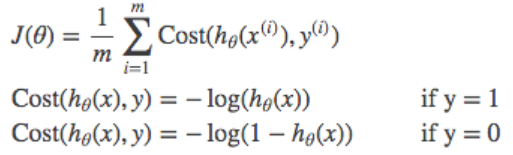

In [90]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

Above functions compressed into one
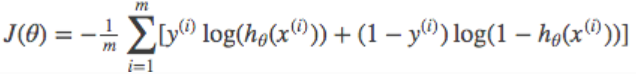

Vectorized cost function
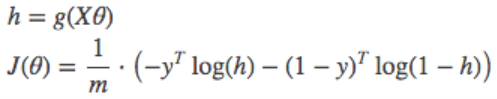

Gradient descent
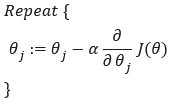

Vectorized gradient descent
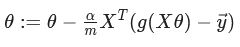

In [91]:
def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta, x)) - y)

def train(x, y, theta, l, iter):
    for i in range(iter):
        theta = theta - (l * gradient(theta, x, y))
    return theta

In [92]:
parameters = train(X, y, theta, 0.01, 10000)
parameters

matrix([[-5.04796734],
        [ 0.60166638],
        [ 0.45201055]])

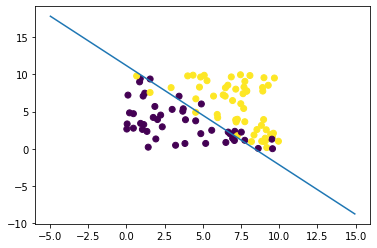

In [93]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]

y_values = - (parameters[0, 0] + np.dot(parameters[1, 0], x_values)) / parameters[2, 0]

c = data.iloc[:, 2]

plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=c)
plt.plot(x_values, y_values)
plt.show()